In [10]:
'Task 1: Data Exploration and Preprocessing'
# 1.1 Load and Inspect Data
# Import necessary libraries
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
import seaborn as sns

# Load California dataset
housing = fetch_california_housing(as_frame=True) # added
df = housing.frame

# Preview dataset
print(df.head())
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

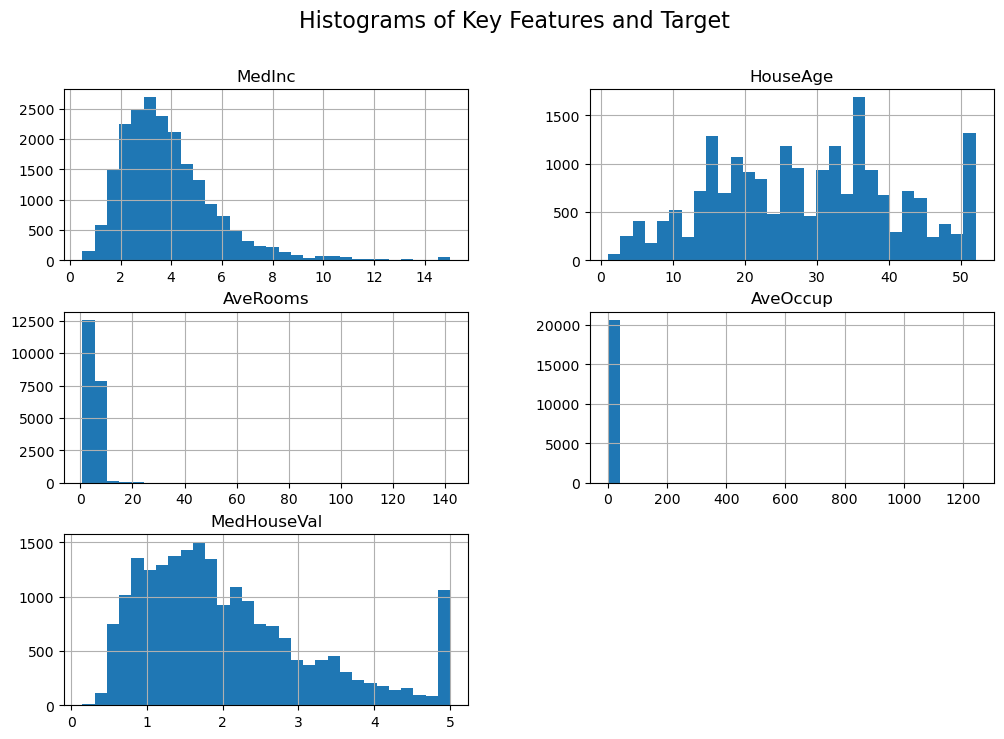

In [11]:
#1.2 Exploratory Data Analysis (EDA)
# Histograms 
df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Key Features and Target", fontsize=16)
plt.show()
# Shows distribution of target (MedHouseVal) and selected important features.

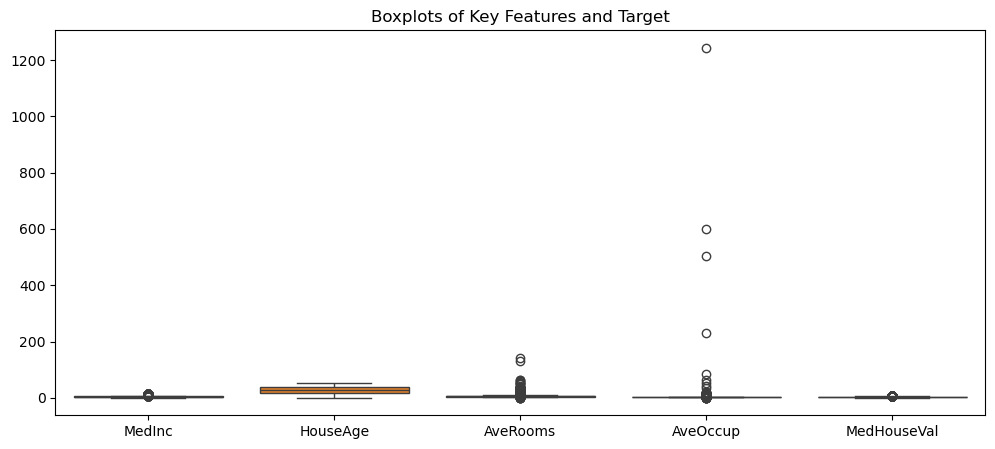

In [12]:
# Boxplots 
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']])
plt.title("Boxplots of Key Features and Target")
plt.show()
# Helps detect outliers in features and target.

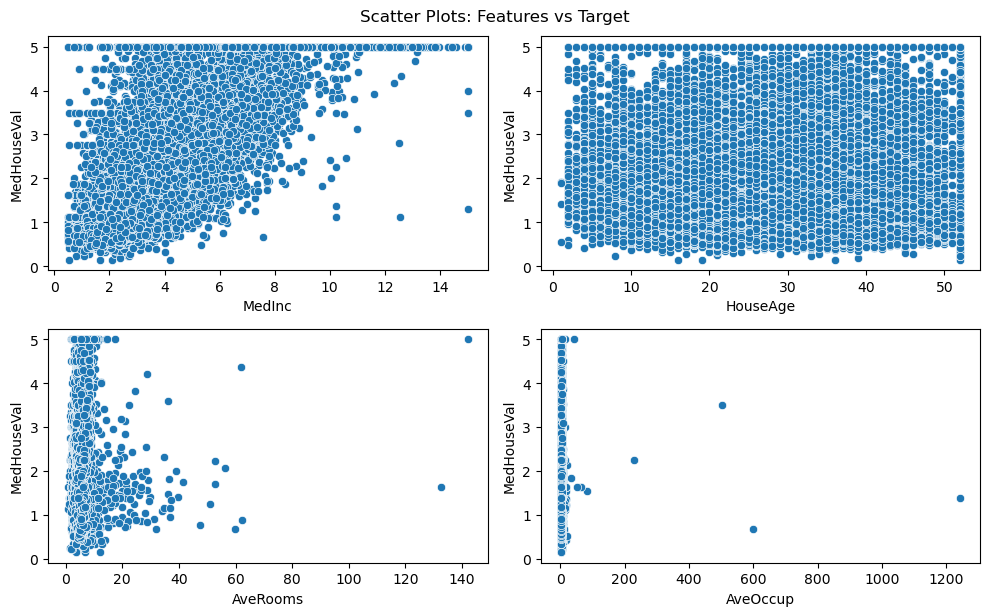

In [19]:
# Scatter Plots
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']

plt.figure(figsize=(10,6))
for i, feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[feature], y=df['MedHouseVal'])
    plt.xlabel(feature)
    plt.ylabel("MedHouseVal")
plt.tight_layout()
plt.suptitle("Scatter Plots: Features vs Target", fontsize=12, y=1.02)
plt.show()

----- SIMPLE REGRESSION (MedInc)-----

OLS Regression R^2 score: 0.4589
OLS Regression MSE: 0.7091

Linear Regression R^2 score: 0.4589
Linear Regression MSE: 0.7091

Ridge Regression R^2 score: 0.4589
Ridge Regression MSE: 0.7091

Lasso Regression R^2 score: 0.4534
Lasso Regression MSE: 0.7162



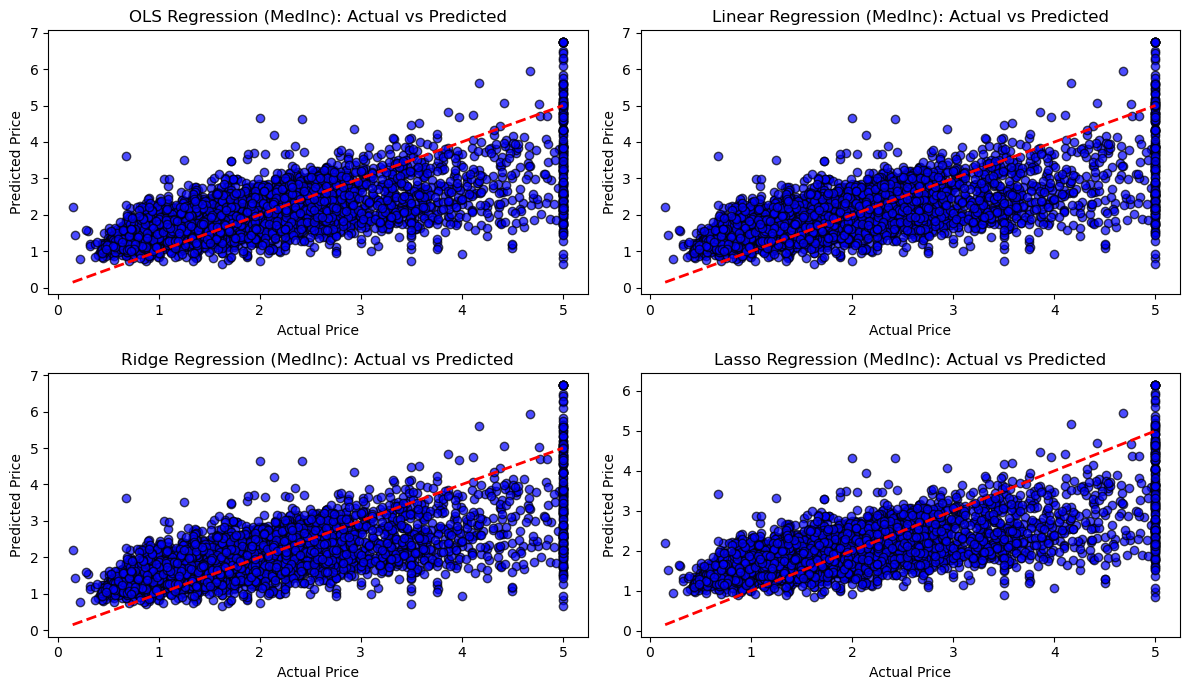

In [20]:
'Task 2: Regression Analysis'
# 1. SIMPLE LINEAR REGRESSION (MedInc Only)

# Use existing DataFrame `df`
X_medinc = df[['MedInc']].to_numpy() # single feature
y = df['MedHouseVal'].to_numpy()  # target variable

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_medinc, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add constant for OLS
X_train_ols = sm.add_constant(X_train_scaled)
X_test_ols = sm.add_constant(X_test_scaled)

# Train models
ols_model = sm.OLS(y_train, X_train_ols).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_model = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
lasso_model = Lasso(alpha=0.1).fit(X_train_scaled, y_train)

# Predict
y_pred_ols = ols_model.predict(X_test_ols)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

print("----- SIMPLE REGRESSION (MedInc)-----\n")
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plot Actual vs Predicted
fig, axs = plt.subplots(2, 2, figsize=(12,7))
axs = axs.flatten()
for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolor='k')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression (MedInc): Actual vs Predicted')
plt.tight_layout()
plt.show()

----- MULTIPLE REGRESSION (All Features) -----

OLS Regression (Test) R^2 score: 0.5758
OLS Regression (Test) MSE: 0.5559

Linear Regression (Test) R^2 score: 0.5758
Linear Regression (Test) MSE: 0.5559

Ridge Regression (Test) R^2 score: 0.5758
Ridge Regression (Test) MSE: 0.5559

Lasso Regression (Test) R^2 score: 0.5768
Lasso Regression (Test) MSE: 0.5545

Validation Performance (for model selection):
Ridge Regression (Validation) R^2: 0.6159, MSE: 0.5383
Lasso Regression (Validation) R^2: 0.6157, MSE: 0.5385



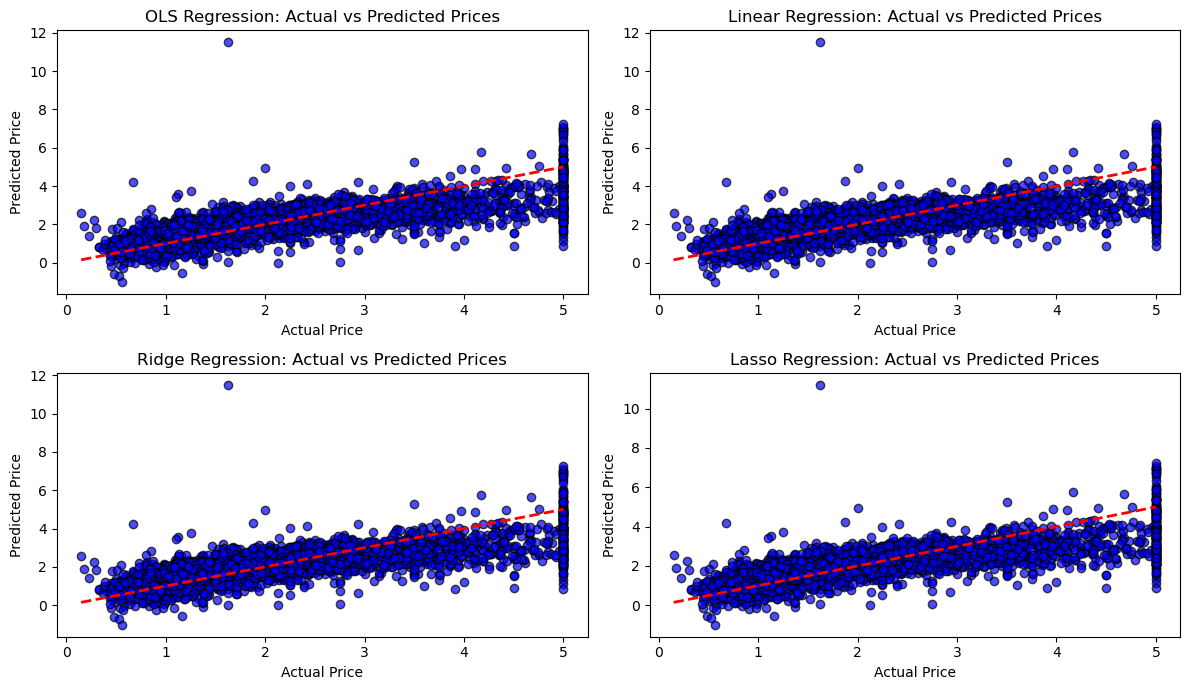

In [24]:
# -------------------------------
# 2. MULTIPLE LINEAR REGRESSION (ALL FEATURES)
# -------------------------------

X = df.drop(columns='MedHouseVal').to_numpy()  # all features
y = df['MedHouseVal'].to_numpy()              # target variable

# Split dataset: 70% train, 10% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Add constant for OLS
X_train_ols = sm.add_constant(X_train_scaled)
X_val_ols = sm.add_constant(X_val_scaled)
X_test_ols = sm.add_constant(X_test_scaled)

# Train models
ols_model = sm.OLS(y_train, X_train_ols).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict (Test + Validation)
y_pred_ols = ols_model.predict(X_test_ols)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Validation predictions (for Ridge & Lasso tuning showcase)
y_val_pred_ridge = ridge_model.predict(X_val_scaled)
y_val_pred_lasso = lasso_model.predict(X_val_scaled)

# Evaluate on Test Set
print("----- MULTIPLE REGRESSION (All Features) -----\n")
for name, y_pred in zip(models, [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]):
    print(f"{name} Regression (Test) R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression (Test) MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Validation Performance (only Ridge, Lasso)
print("Validation Performance (for model selection):")
print(f"Ridge Regression (Validation) R^2: {r2_score(y_val, y_val_pred_ridge):.4f}, MSE: {mean_squared_error(y_val, y_val_pred_ridge):.4f}")
print(f"Lasso Regression (Validation) R^2: {r2_score(y_val, y_val_pred_lasso):.4f}, MSE: {mean_squared_error(y_val, y_val_pred_lasso):.4f}\n")

# Actual vs Predicted (Test Set)
fig, axs = plt.subplots(2, 2, figsize=(12,7))
axs = axs.flatten()
for i, (name, y_pred) in enumerate(zip(models, [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso])):
    axs[i].scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolor='k')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Actual vs Predicted Prices')
plt.tight_layout()
plt.show()